In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 4 Image Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb">
      <img src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen4_image_generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen4_image_generation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb">
      <img img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen4_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 4

Imagen 4 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 4 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail and rendered text across a wide variety of styles. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Imagen 4 , Imagen 4 Fast, and Imagen 4 Ultra models to generate images showcasing:

- Stylistic variety
- Multilingual prompt support & enhancement
- High quality photorealism
- Text rendering
- Image watermarking


## Get started


### Install Google Gen AI SDK for Python


In [2]:
%pip install --upgrade --quiet google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.4/206.4 kB 9.4 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai import types

### Set up Google Cloud Project or API Key for Vertex AI

You'll need to set up authentication by choosing **one** of the following methods:

1.  **Use a Google Cloud Project:** Recommended for most users, this requires enabling the Vertex AI API in your Google Cloud project.
    - [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com)
    - Run the cell below to set your project ID and location.
    - Read more about [Supported locations](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/locations)
2.  **Use a Vertex AI API Key (Express Mode):** For quick experimentation.
    - [Get an API Key](https://cloud.google.com/vertex-ai/generative-ai/docs/start/express-mode/overview)
    - Run the cell further below to use your API key.

#### Option 1. Use a Google Cloud Project

In [6]:
import os

PROJECT_ID = "xxxx-xxxx-xxxx-386906"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

#### Option 2. Use a Vertex AI API Key (Express Mode)

Uncomment the following block to use Express Mode

In [7]:
# API_KEY = "[your-api-key]"  # @param {type: "string", placeholder: "[your-api-key]", isTemplate: true}

# if not API_KEY or API_KEY == "[your-api-key]":
#     raise Exception("You must provide an API key to use Vertex AI in express mode.")

# client = genai.Client(vertexai=True, api_key=API_KEY)

Verify which mode you are using.

In [8]:
if not client.vertexai:
    print("Using Gemini Developer API.")
elif client._api_client.project:
    print(
        f"Using Vertex AI with project: {client._api_client.project} in location: {client._api_client.location}"
    )
elif client._api_client.api_key:
    print(
        f"Using Vertex AI in express mode with API key: {client._api_client.api_key[:5]}...{client._api_client.api_key[-5:]}"
    )

Using Vertex AI with project: xxxx-xxxx-xxxx-386906 in location: us-central1


### Define a helper function to display images

In [9]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 700,
    max_height: int = 400,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

### Load the Imagen 4 image generation models

In [10]:
generation_model = "imagen-4.0-generate-preview-06-06"
generation_model_fast = "imagen-4.0-fast-generate-preview-06-06"
generation_model_ultra = "imagen-4.0-ultra-generate-preview-06-06"

### Imagen 4

With Imagen 4, you can generate high quality images with improved prompt adherence and text rendering capabilities. Run the cell below to see an example of an image generated with Imagen 4 that includes specific text and taglines to be rendered within the image.

You can configure the `aspect ratio` to any of the following:
- `1:1`
- `9:16`
- `16:9`
- `3:4`
- `4:3`

When using Imagen 4 you can set `number_of_images` to any value between 1 and 4.

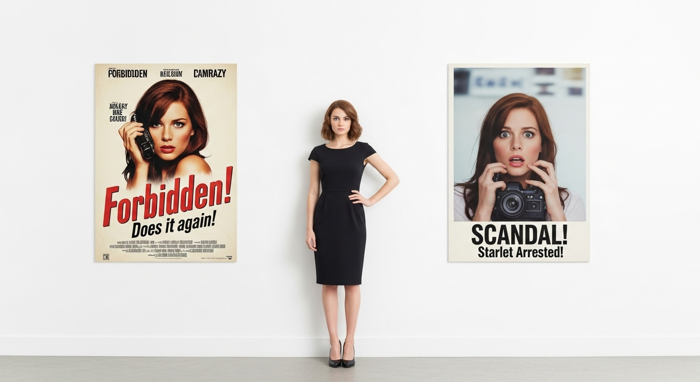

In [18]:
prompt = """
A young woman stands with perfect posture in front of a white wall with two giant movie posters featuring a photo of her are mounted. First poster has the text: "Forbidden!", tagline: "Does it again!' Second poster has the text: "SCANDAL", tagline: "Starlet Arrested!"
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        aspect_ratio="16:9",
        number_of_images=1,
    ),
)

if image.generated_images:
    display_image(image.generated_images[0].image)
else:
    print("Image generation failed or no images were returned.")
    # The response object might not always have prompt_feedback, so check for it.
    if hasattr(image, 'prompt_feedback') and image.prompt_feedback:
        print("Prompt feedback:")
        for feedback in image.prompt_feedback:
            print(f"- {feedback.safety_ratings}")
    else:
        print("No prompt feedback available.")

### Imagen 4 Fast

With Imagen 4, you also have the option to use Imagen 4 Fast. These two model options give you the choice to optimize for quality and latency, depending on your use case.

**Imagen 4:** Generates high quality images with natural lighting and increased photorealism.

**Imagen 4 Fast:** Suitable for creating brighter images with a higher contrast.

In [ ]:
import matplotlib.pyplot as plt

prompt = """
an image of the New York skyline at sunset
"""

# Imagen 4 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

# Imagen 4 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 4")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 4 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

### High quality images with Imagen 4 Ultra

Along with Imagen 4 and Imagen 4 Fast, you have the option to use Imagen 4 Ultra. This model will return one exceptionally high quality image with latency as a tradeoff.

When generating images of people you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
- `person_generation`
  - `DONT_ALLOW`
  - `ALLOW_ADULT`
  - `ALLOW_ALL`
- `safety_filter_level`
  - `BLOCK_LOW_AND_ABOVE`
  - `BLOCK_MEDIUM_AND_ABOVE`
  - `BLOCK_ONLY_HIGH`
  - `BLOCK_NONE`

**NOTE:** When using Imagen 4 Ultra, `number_of_images` must be set to 1.

In [ ]:
prompt = """
Photorealistic night scene: looking into a brightly lit, classic 1960s American diner from the cold street outside. The entire view is filtered through a large pane of glass streaked with rainwater. The neon 'DINER' sign outside casts colorful reflections on the wet pavement and the window itself. Moody, nostalgic, shallow depth of field emphasizing the window surface.
"""

image = client.models.generate_images(
    model=generation_model_ultra,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_image(image.generated_images[0].image)

### Multilingual and prompt rewriter support

Imagen 4 is also capable of processing text prompts in multiple languages. The following input values are supported for the text-prompt language:
- English
- Chinese (Simplified)
- Chinese (Traditional)
- Hindi
- Japanese
- Korean
- Portuguese
- Spanish
- German
- French

The `imagen-4.0-generate-preview-06-06` model offers the option to enhance your provided prompt. To utilize this feature, set `enhance_prompt` to True. A new, detailed prompt will be created from your original one to help generate higher quality images.

In [ ]:
prompt = """
Una pintura al óleo impresionista de una taza de café sobre una mesa en una cocina, con las palabras 'buenos días' escritas en una fuente caprichosa en la taza.
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

### Better text rendering

Imagen 4 does a great job accurately rendering words, titles, and phrases in images. This could be particularly useful for comics, logo generation, flowcharts, flyers, and posters.

In [ ]:
prompt = """
A panel of a comic strip. A cute gray cat is talking to a bulldog. The cat appears to be slightly disgusted. The cat says in a talk bubble: "You really seem to enjoy going outside. Fascinating." The dog responds by shrugging his shoulders. Well-articulated illustration with confident lines and shading.
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="4:3",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_image(image.generated_images[0].image)

### Add image watermark

By default, a digital watermark, or [SynthID](https://deepmind.google/technologies/synthid/), is added to Imagen 4 images. If you would like to explicitly set the watermark to True, you can do so with the `add_watermark` parameter. You can also [verify a watermarked image](https://cloud.google.com/vertex-ai/generative-ai/docs/image/generate-images#watermark) via Vertex AI Studio.

In [ ]:
prompt = """
Design an elegant and symbolic movie poster for the period romance 'The Crimson Thread'. A close-up, artistic shot of two hands, almost touching, with a single, vibrant crimson thread winding between their fingers and subtly forming the title 'The Crimson Thread' within its loops and flows. The typography of the title should feel like flowy hand-stitched embroidery. The background is a soft-focus, de-saturated garden.
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
        add_watermark=True,
    ),
)

display_image(image.generated_images[0].image)